In [26]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"



mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


Total_stats = pd.merge(mouse_metadata,study_results, how="left", on="Mouse ID")
Total_stats

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
Mice = len(Total_stats["Mouse ID"].unique())
Mice

249

In [3]:
print(Total_stats["Mouse ID"].duplicated())
print(Total_stats[Total_stats.duplicated()])

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [4]:
Clean_stats= Total_stats.drop_duplicates(subset=None, keep=False, inplace=False)
print(len(Clean_stats))

1891


In [5]:
Clean_stats

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
Reg_mean = Clean_stats.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].mean()
Reg_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.414660
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [7]:
Reg_med =Clean_stats.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].median()
Reg_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.965298
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [8]:
Reg_sem =Clean_stats.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].sem()
Reg_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.515178
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
Reg_var =Clean_stats.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].var()
Reg_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.199890
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
Reg_std =Clean_stats.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].std()
Reg_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.496144
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
Reg_stats= {"Average Tumor Volumes": Reg_mean,
                           "Median Tumor Volumes": Reg_mean,
                           "Tumor Volume SEM": Reg_sem,
                           "Tumor Volume Variances": Reg_var,
                            "Tumor Volume St. Devs": Reg_std}
Regimen_stats = pd.DataFrame(Reg_stats, columns= ["Average Tumor Volumes","Median Tumor Volumes", "Tumor Volume SEM", "Tumor Volume Variances","Tumor Volume St. Devs"])
Regimen_stats

,Average Tumor Volumes,Median Tumor Volumes,Tumor Volume SEM,Tumor Volume Variances,Tumor Volume St. Devs
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,0.329346,24.947764,4.994774
Ceftamin,52.591172,52.591172,0.469821,39.290177,6.268188
Infubinol,52.884795,52.884795,0.492236,43.128684,6.567243
Ketapril,55.235638,55.235638,0.603860,68.553577,8.279709
Naftisol,54.331565,54.331565,0.596466,66.173479,8.134708
Placebo,54.033581,54.033581,0.581331,61.168083,7.821003
Propriva,52.414660,52.414660,0.515178,42.199890,6.496144
Ramicane,40.216745,40.216745,0.320955,23.486704,4.846308
Stelasyn,54.233149,54.233149,0.573111,59.450562,7.710419


In [12]:
Regimen_stats.describe()

,Average Tumor Volumes,Median Tumor Volumes,Tumor Volume SEM,Tumor Volume Variances,Tumor Volume St. Devs
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.985355,50.985355,0.499870,47.693228,6.808508
std,5.623859,5.623859,0.102579,16.062798,1.219034
min,40.216745,40.216745,0.320955,23.486704,4.846308
25%,52.458788,52.458788,0.475424,40.017606,6.325177
50%,53.060651,53.060651,0.515788,45.831020,6.766916
75%,54.183257,54.183257,0.579276,60.738703,7.793357
max,55.235638,55.235638,0.603860,68.553577,8.279709


<IPython.core.display.Javascript object>


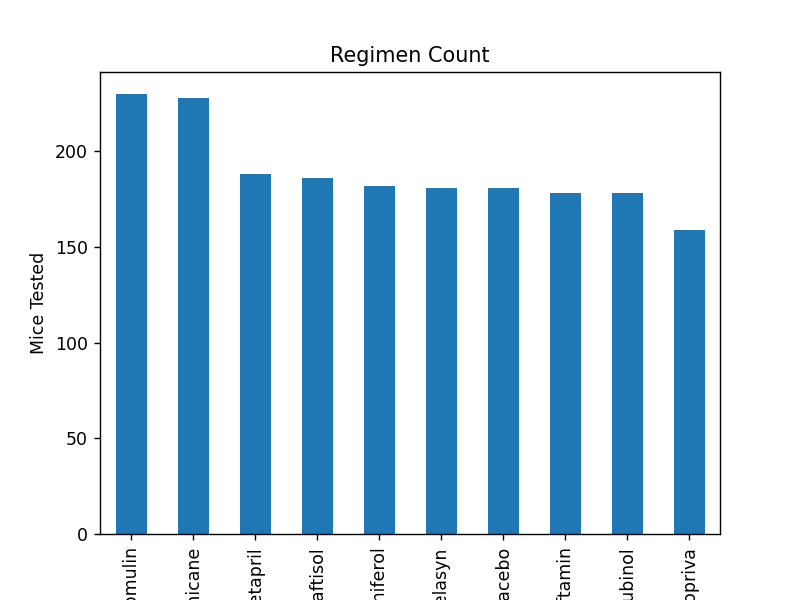

<function matplotlib.pyplot.show(block=None)>

In [25]:
Drug_Count= Clean_stats["Drug Regimen"].value_counts()
Drug_Count.plot(kind="bar")
plt.title("Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.show

<IPython.core.display.Javascript object>


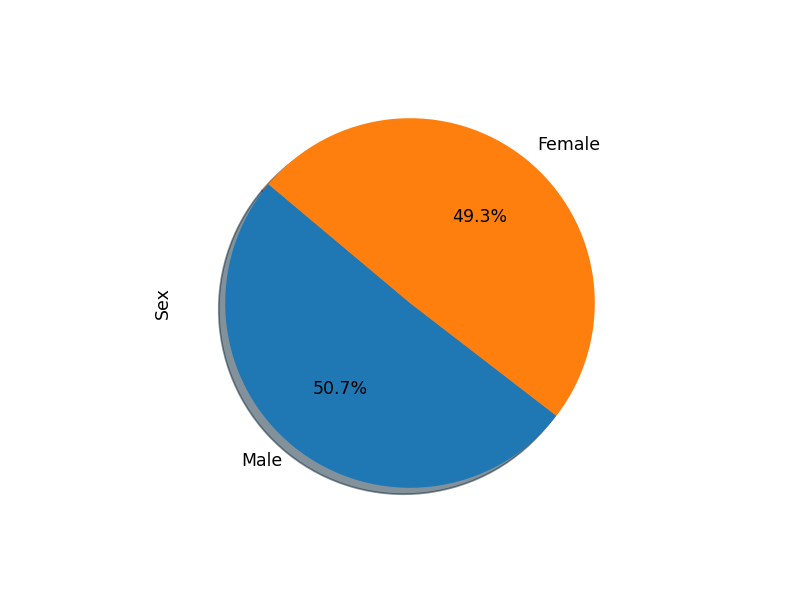

<function matplotlib.pyplot.show(block=None)>

In [21]:
Sex_count = Clean_stats["Sex"].value_counts()
Sex_count.plot(kind="pie", autopct= '%1.1f%%', shadow=True, startangle=140)
plt.show

In [27]:
Max_tumor_size = Clean_stats.groupby(["Mouse ID"])["Timepoint"].max()
Max_tumor_size = Max_tumor_size.reset_index()

In [28]:
Max_merge = Max_tumor_size.merge(Clean_stats,how="left", on=["Mouse ID","Timepoint"])
Max_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [45]:
Capomulin= Clean_stats.loc[Clean_stats['Drug Regimen']== 'Capomulin']
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


<IPython.core.display.Javascript object>


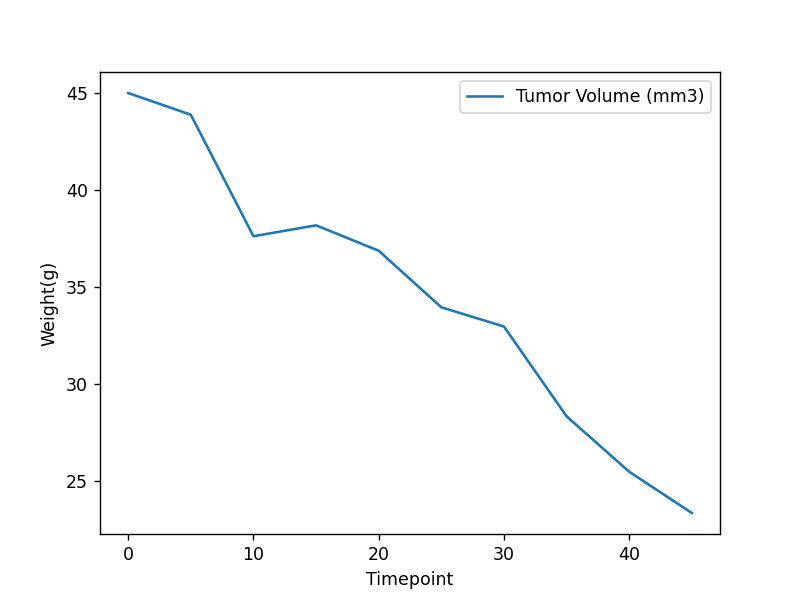

In [63]:
Tum_vs_time = Capomulin.loc[Capomulin['Mouse ID']== 's185']
Tum_vs_time.plot(x='Timepoint', y= 'Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Weight(g)')
plt.show()

<IPython.core.display.Javascript object>


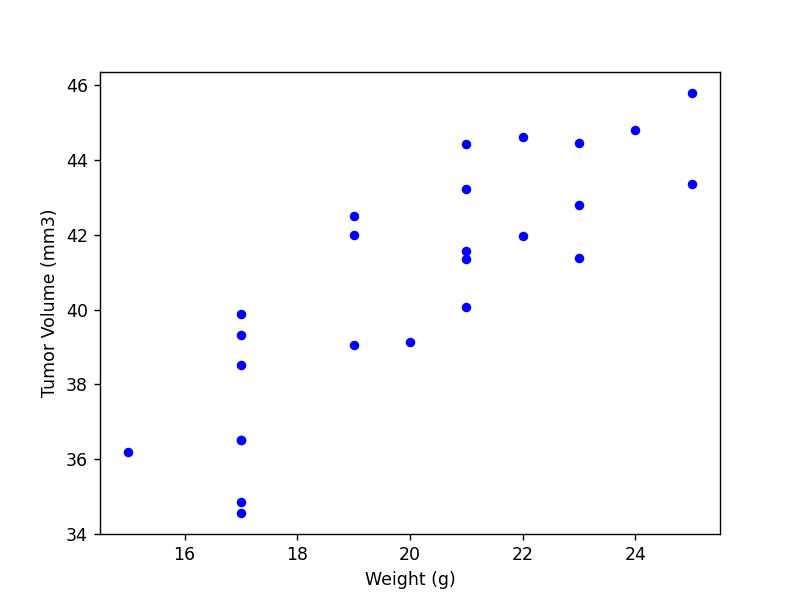

In [62]:
Cap_avg = Capomulin.groupby(['Mouse ID']).mean()
Weight_cor = Cap_avg.plot(kind='scatter', x='Weight (g)',y='Tumor Volume (mm3)',color = 'Blue')
plt.show()